<a href="https://colab.research.google.com/github/clayozuna/tamu_datathon/blob/master/Main_File_3_Data_Visualization_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 3: Data Visualization

![alt text](https://revsearch-assets.s3.amazonaws.com/images/ds_process1.png)

> Credits: Bin Yu, [Veridical Data Science](https://arxiv.org/pdf/1901.08152.pdf)

## Learning Objectives:
- scatter/line/bar/pie plots
- heat maps
- distribution plots
  - boxplots
  - uni/mutli - variate kernel density estimation
  - decision boundaries
- styling and theming 
- excercise: visualize your data

We will be using matplotlib and seaborn for plotting. Seaborn is a wrapper around matplotlib so it produces generally prettier plots, but we can still use matplotlib for basic stuff like adding a title.

Consider the following spectrum:
**matplotlib -> seaborn -> plotly -> tableau**
</br>
Moving from left to right, we move from low level interfaces to high level. Matplotlib lets you control every last bit to the pixel through code. Tableau is a no-code downloadable software for exploring datasets.

Seaborn, our focus here, sits in the middle. It is free, relatively easy, integrable with the rest of our code, and highly customizable through code.

If you are following along on your own, try [this](https://www.kaggle.com/learn/data-visualization) lesson on kaggle for more in depth explainations on the plots we are using here.


In [0]:
import pandas as pd
import seaborn as sns

In [0]:
# making a dataframe
students = pd.DataFrame({
    'name': ['Charis',  'Bruno',  'Mara',  'Brett',  'Keeva',  'Karson',  'Reyansh',  'Olivier',  'Mara',  'Lowri'],
    'haircolor': pd.Categorical(['red', 'red', 'brown', 'blonde', 'brown', 'brown', 'blonde', 'brown', 'brown', 'blonde']),
    'weight': [176, 111, 181, 170, 198, 144, 114, 203, 187, 197],
    'birthdate': pd.to_datetime(['28/4/1955', '26/10/1956', '9/5/1984', '1/7/1957', '23/8/1961', '11/6/1969', '27/11/1974', '4/2/1992', '14/1/1983', '4/2/1992'])
    })
heights = pd.Series({'Brett': 75, 'Bruno': 67, 'Charis': 79, 'Karson': 68, 'Keeva': 75, 'Lowri': 73, 'Mara': 72, 'Olivier': 76, 'Reyansh': 58}, name='height')
students = students.set_index('name').join(heights)
students.head()

,haircolor,weight,birthdate,height
Brett,blonde,170,1957-01-07,75
Bruno,red,111,1956-10-26,67
Charis,red,176,1955-04-28,79
Karson,brown,144,1969-11-06,68
Keeva,brown,198,1961-08-23,75


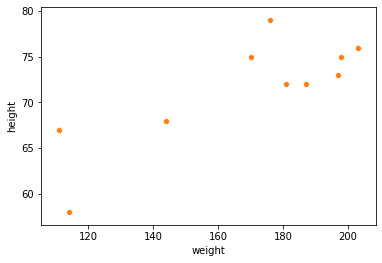

In [0]:
# two continuous variables; we want to see the relationship between two variables
sns.scatterplot(students.weight, students.height)
sns.scatterplot(x='weight', y='height', data=students)

**Note:** From this plot, we can see:
* A relatively strong positive linear relationship between weight and height

#### Pearson’s Correlation
The most common measure of correlation is Pearson’s product-moment correlation, denoted r (you can ignore the p below).

- A correlation of 1 indicates a perfect positive correlation.
- A correlation of -1 indicates a perfect negative correlation.
- A correlation of 0 indicates that there is no relationship between the different variables.
- Values between -1 and 1 denote the strength of the correlation, as shown in the example below.

<img src="https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/05/Pearson%E2%80%99s-Product-Moment-Correlation.png" alt="alt" width="500"/>

[source](https://www.displayr.com/what-is-correlation/)

In [0]:
students.corr()['weight']['height']

0.805062920244623

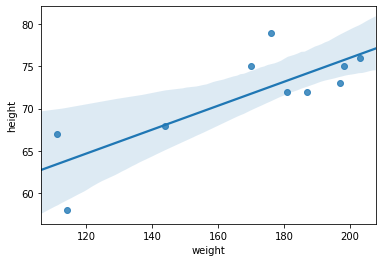

In [0]:
# two continuous variables; with regression line
sns.regplot(students.weight, students.height)

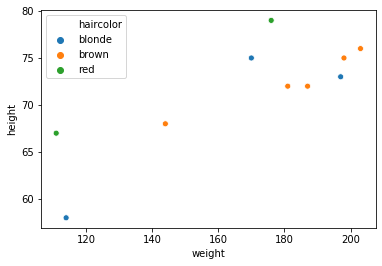

In [0]:
# two continuous variables, grouped by one categorical
sns.scatterplot(students.weight, students.height, hue=students.haircolor)

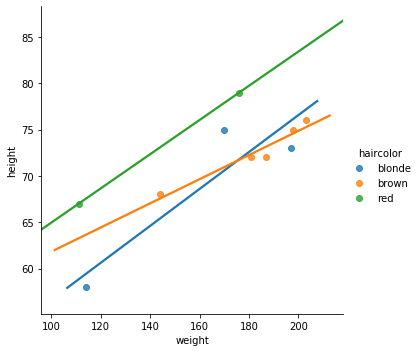

In [0]:
# two continuous variables, grouped by one categorical; with regression line
sns.lmplot('weight', 'height', hue='haircolor', data=students, ci=False)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


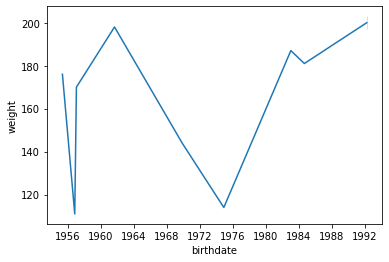

In [0]:
# two continuous variables; when we want to track the changes in y over a "progression" of x
sns.lineplot(x='birthdate', y='weight', data=students)

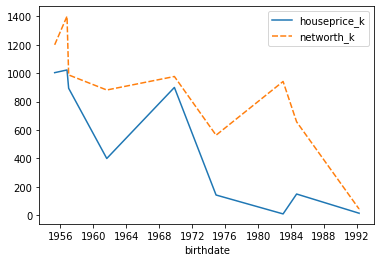

In [0]:
df = pd.DataFrame({
  'birthdate': pd.to_datetime(['28/4/1955', '26/10/1956', '9/5/1984', '1/7/1957', '23/8/1961', '11/6/1969', '27/11/1974', '4/2/1992', '14/1/1983', '4/2/1992']),
  'houseprice_k': [1004, 1023, 150, 894, 400, 900, 143, 10, 10, 20],
  'networth_k': [1200, 1401, 658, 988, 882, 977, 564, 50, 942, 40],
}).set_index('birthdate')

# a slick way to plot multiple continuous variables against a single continuous
#   - for this to work, the x axis has to be the index. all the columns in the dataframe have to be continuous
sns.lineplot(data=df)

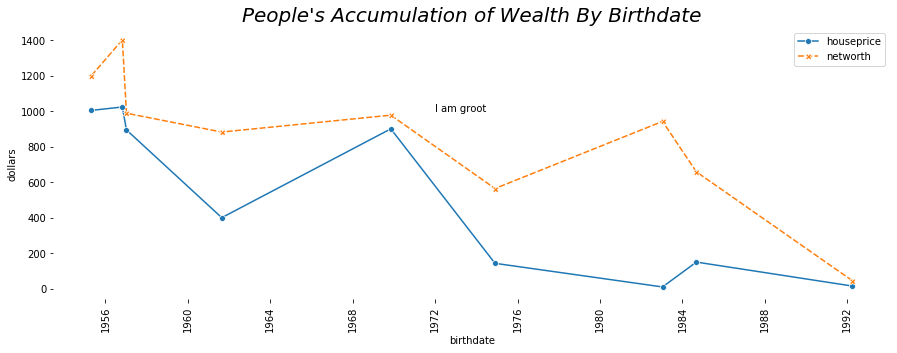

In [0]:
# styling: title, label, ticks, legend, color, adding text
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.title("People's Accumulation of Wealth By Birthdate", fontsize=20, style='italic')
sns.lineplot(data=df, markers=True)
plt.legend(['houseprice', 'networth'])
plt.ylabel('dollars')
plt.xticks(rotation=90)
plt.text('1972', 1000, 'I am groot')
plt.box(False)
plt.show()

Text(0.5, 1.0, 'Average Weight Per Haircolor')

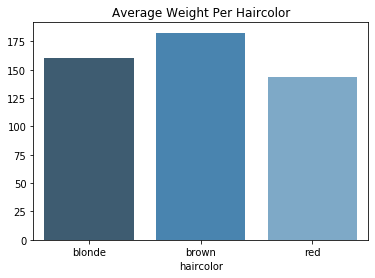

In [0]:
# compare continuous quantities across a categorical variable
s = students.groupby('haircolor').weight.mean()
# note pallette:
# find more - https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/
# or here - http://colorbrewer2.org/#type=sequential&scheme=GnBu&n=3
sns.barplot(s.index, s.values, palette="Blues_d")
plt.title('Average Weight Per Haircolor')

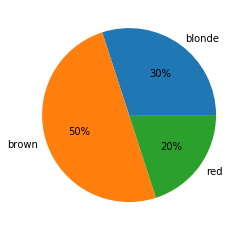

In [0]:
# compare makeup of a continuous measurement split across a categorical variable
s = students.groupby('haircolor').haircolor.count()
# note the plt instead of sns
plt.pie(s.values, labels=s.index, autopct='%.0f%%')
plt.show()

In [0]:
# heatmap: a continuous variable groupedby two categorical
# the two categorical factors should be ordered levels
# heatmaps do a good job of showing "clusters" in the data
taxi_rides = pd.DataFrame({
    'month': pd.Categorical([9, 4, 11, 10, 6, 5, 3, 5, 8, 11, 2, 4, 3, 10, 11, 8, 8, 1, 3, 6, 2, 11, 3, 1, 6, 10, 1, 2, 12, 8]),
    'weekday': ['S', 'U', 'M', 'W', 'U', 'M', 'U', 'S', 'U', 'W', 'U', 'S', 'F', 'R', 'U', 'W', 'T', 'U', 'R', 'S', 'T', 'U', 'R', 'U', 'U', 'F', 'T', 'R', 'W', 'U'],
    'distance': [13.0, 5.6, 18.0, 1.0, 3.8, 6.0, 17.0, 12.6, 0.2, 1.0, 7.2, 8.0, 7.6, 16.4, 5.8, 6.0, 3.2, 19.6, 17.8, 19.0, 3.8, 15.4, 15.6, 2.2, 19.0, 16.6, 2.0, 3.2, 15.6, 12.2]
})
#.groupby(['month', 'weekday']).sum().unstack()
# sns.heatmap(data=taxi_rides, annot=True)
# plt.show()
import plotly.express as px
fig = px.density_heatmap(taxi_rides, x="month", y="weekday", z='distance', histfunc='avg')
fig.update_layout(autosize=False, width=500, height=300)
fig.show()

## Distributions

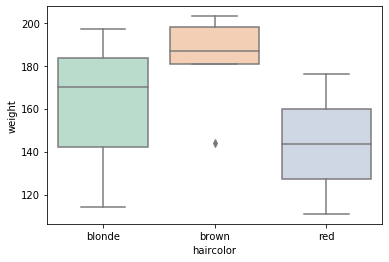

In [0]:
sns.boxplot('haircolor', 'weight', data=students, palette='Pastel2')

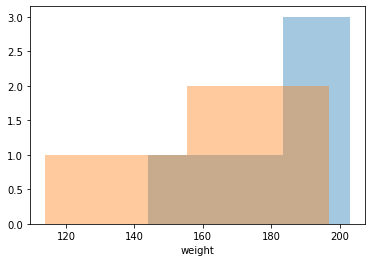

In [0]:
# univariate distributions
browns = students[students.haircolor == 'brown']
blondes = students[students.haircolor == 'blonde']
sns.distplot(browns.weight, kde=False, hist=True, label='brown')
sns.distplot(blondes.weight, kde=False, hist=True, label='blonde')

### A note on "skew"

We call a dataset skewed if there is more density to the right or left of the distribution.
- If there is more data to the right, we say the data has a **left tail** and thus is **left skewed**
- If there is more data to the left, we say the data has a **right tail** and this is **right skewed**





In [0]:
#@title Test Your Knowledge
#@markdown What skew is the data shown above? Pick one from the dropdown then run this cell.

dropdown = '' #@param ["", "right skew", "left skew", "no skew"]

import binascii
#binascii.b2a_hex(b"input")
def check(answer, truth, label=''):
  decode = lambda s: binascii.unhexlify(s.encode()).decode()
  if answer == '':
    print(f'Please answer the question{" for " if label else ""}{label}. 🤓')
  elif answer == decode(truth):
    print(f'{label}{" - " if label else ""}Correct! 🤩')
  else:
    print(f'{label}{" - " if label else ""}Incorrect 😞')


check(dropdown, '6c65667420736b6577')

Please answer the question. 🤓


### Median is "robust to outliers"
![alt text](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg)

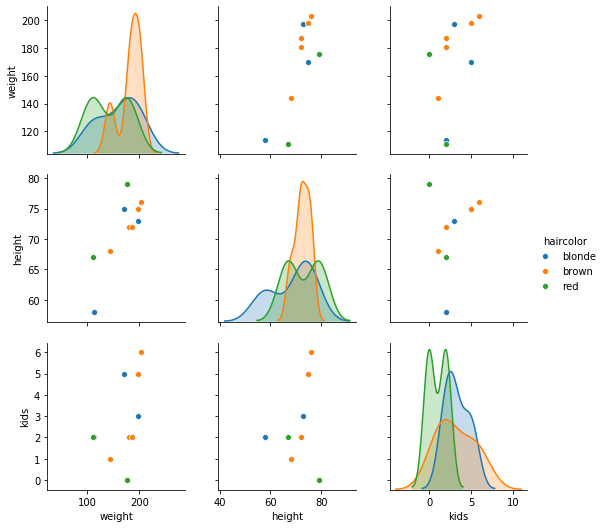

In [0]:
# see all continuous compared to one-another
# a very nice one for exploratory analysis
kids = pd.Series({'Brett': 5, 'Bruno': 2, 'Charis': 0, 'Karson': 1, 'Keeva': 5, 'Lowri': 3, 'Mara': 2, 'Olivier': 6, 'Reyansh': 2}, name='kids')
temp = students.join(kids)
sns.pairplot(temp, hue="haircolor")

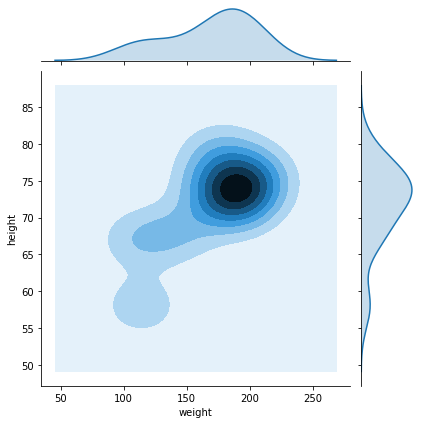

In [0]:
# bivariate distribution
sns.jointplot(x=students.weight, y=students.height, kind="kde")

## Subplots

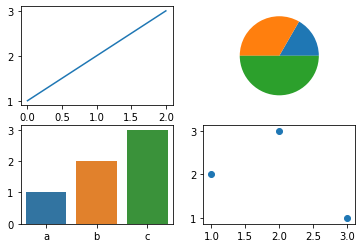

In [0]:
# subplots
plt.subplot(2,2,1)
plt.plot([1,2,3])
plt.subplot(2,2,2)
plt.pie([1,2,3])
plt.subplot(2,2,3)
sns.barplot(['a', 'b', 'c'], [1,2,3])
plt.subplot(2,2,4)
plt.scatter([1,2,3], [2, 3, 1])

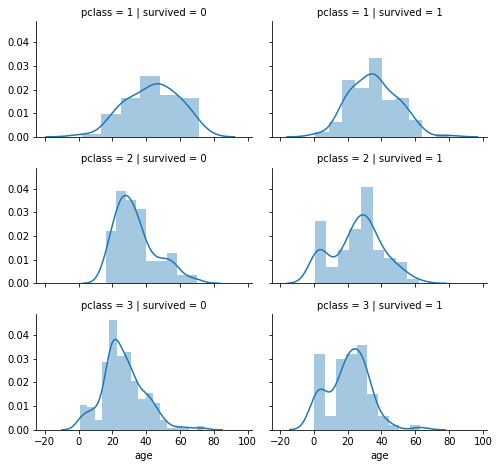

In [0]:
# facetgrid (grid of same plots)
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.columns
grid = sns.FacetGrid(titanic, col='survived', row='pclass', height=2.2, aspect=1.6)
grid.map(sns.distplot, 'age')

### Themeing

['classic', 'seaborn-ticks', 'seaborn-deep', 'seaborn-poster', 'seaborn-dark', 'tableau-colorblind10', 'Solarize_Light2', 'fivethirtyeight', 'seaborn-white', 'seaborn-dark-palette', 'seaborn-bright', '_classic_test', 'seaborn-darkgrid', 'seaborn', 'fast', 'seaborn-pastel', 'grayscale', 'dark_background', 'seaborn-talk', 'ggplot', 'seaborn-notebook', 'seaborn-whitegrid', 'seaborn-muted', 'seaborn-colorblind', 'seaborn-paper', 'bmh']


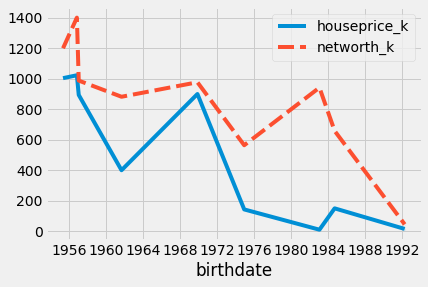

In [0]:
# note: running this is "sticky". It will apply to the every plot you generate after. 
# read more: https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08
print(plt.style.available)
plt.style.use('fivethirtyeight')
sns.lineplot(data=df)

### Interactive Plotting Library: Plotly
- High-level interactive python package: [**plotly express**](https://plot.ly/python/plotly-express/).

- Check out [this](https://towardsdatascience.com/plotly-express-yourself-98366e35ad0f) article to see what you can do!



In [0]:
gapminder = px.data.gapminder()
px.scatter(gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

## Extra!
### Plotting Maps
- [Using Plotly](https://plot.ly/python/scatter-plots-on-maps/)

### Dashboards: Tableau
> Highly interactive visualizations (must download and pay for software)

- Software download on computer
- Paid (free trial)
- Extremely powerful
- Check out [these](https://public.tableau.com/en-us/gallery/?tab=viz-of-the-day&type=viz-of-the-day)

### Dashboards: Google Data Studio
> Online data visualization dashboard made by google






# Challenges

- import the **iris** dataset using seaborn `load_dataset()`
  - use a `pairplot` to visualize the dataset
    - which species has a petal_lengths that is most skewed?
    - is it **right** or **left** skewed?
    - overall, would you say variables have **positive** or **negative** correlation with eachother?
- load the **flights** dataset using seaborn `load_dataset()`
  - visualize the sum number of passengers by year and month
    - use a groupby and unstack
    - use a heatmap
    - which season consistently has more passengers flying? **winter** or **summer**?
  - visualize the sum number of passengers year-over-year
    - use a groupby
    - use a lineplot
    - does the number of passengers grow **linearly** or **exponentially**?

In [0]:
#@title Iris - PairPlot
#@markdown Which species has a petal_lengths that is most skewed?
species = '' #@param ["", "versicolor", "virginica", "vertosa"]

#@markdown Is it left or right skewed?
skew = '' #@param ["", "right skew", "left skew"]

#@markdown Overall, would you say variables have positive or negative correlation with eachother?
correlation = '' #@param ["", "positive", "negative"]

check(species, '7665727369636f6c6f72', 'species')
check(skew, '6c65667420736b6577', 'skew')
check(correlation, '706f736974697665', 'correlation')

Please answer the question for species. 🤓
Please answer the question for skew. 🤓
Please answer the question for correlation. 🤓


In [0]:
#@title Flights - Heatmap & Lineplot
#@markdown Which season consistently has more passengers flying? winter or summer?
season = '' #@param ["", "winter", "summer"]

#@markdown Does the number of passengers grow linearly or exponentially?

growth = '' #@param ["", "linearly", "exponentially"]

check(season, '73756d6d6572', 'season')
check(growth, '6c696e6561726c79', 'growth')

Please answer the question for season. 🤓
Please answer the question for growth. 🤓


## Project Work

- Make at least 3 visualizations of your dataset to understand it better.
- Add formatting like title
- Add text in your notebook to interpret the visualizations.